In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils import Bunch
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from datetime import datetime
import os

In [ ]:
# Print python version
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
Version info.
sys.version_info(major=3, minor=8, micro=15, releaselevel='final', serial=0)


In [ ]:
from google.colab import drive

In [ ]:
# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to read the csv file, return a pandas dataframe
def read_csv_files(path_name):
    df_ori = pd.read_csv(path_name)
    return df_ori

In [ ]:
# Achieve list of name for all csv files
g = os.walk("/content/drive/MyDrive/dataset/N-BaIoT/")
file_path_list = []
for path,dir_list,file_list in g:
    for file_name in file_list:
        file_path = os.path.join(path, file_name)
        file_path_list.append(file_path)
file_path_list_order = sorted(file_path_list)
file_path_list_2d = np.asarray(file_path_list_order).reshape(5, 5).tolist()
file_path_list_2d

[['/content/drive/MyDrive/dataset/N-BaIoT/1.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/2.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/4.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/5.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/5.mi

In [ ]:
from itertools import chain

# Read all 25 files for five different IoT-edge devices
def df_reader(file_paths):
    df_benign_list = []
    df_ack_list = []
    df_scan_list = []
    df_syn_list = []
    df_udp_list = []

    for i in range(len(file_paths)):
        client_names = file_paths[i]

        # Add labels for both benign, ack, syn and udp
        for j in range(len(client_names)):
            name = client_names[j]
            if "benign" in name:
                df_benign = read_csv_files(path_name=name)
                df_benign_labeled = append_labels(df_benign, 'benign')
                df_benign_list.append(df_benign_labeled)

            elif "ack" in name:
                df_ack = read_csv_files(path_name=name)
                df_ack_labeled = append_labels(df_ack, 'mirai_ack')
                df_ack_list.append(df_ack_labeled)

            elif "scan" in name:
                df_scan = read_csv_files(path_name=name)
                df_scan_labeled = append_labels(df_scan, 'mirai_scan')
                df_scan_list.append(df_scan_labeled)

            elif "syn" in name:
                df_syn = read_csv_files(path_name=name)
                df_syn_labeled = append_labels(df_syn, 'mirai_syn')
                df_syn_list.append(df_syn_labeled)

            elif "udp" in name:
                df_udp = read_csv_files(path_name=name)
                df_udp_labeled = append_labels(df_udp, 'mirai_udp')
                df_udp_list.append(df_udp_labeled)

    # Add client labels for each five csv files
    for i in range (0, 5):
        if i == 0:
            df_benign_list[i]['client'] = 'client1'
            df_ack_list[i]['client'] = 'client1'
            df_scan_list[i]['client'] = 'client1'
            df_syn_list[i]['client'] = 'client1'
            df_udp_list[i]['client'] = 'client1'

        elif i == 1:
            df_benign_list[i]['client'] = 'client2'
            df_ack_list[i]['client'] = 'client2'
            df_scan_list[i]['client'] = 'client2'
            df_syn_list[i]['client'] = 'client2'
            df_udp_list[i]['client'] = 'client2'

        elif i == 2:
            df_benign_list[i]['client'] = 'client3'
            df_ack_list[i]['client'] = 'client3'
            df_scan_list[i]['client'] = 'client3'
            df_syn_list[i]['client'] = 'client3'
            df_udp_list[i]['client'] = 'client3'

        elif i == 3:
            df_benign_list[i]['client'] = 'client4'
            df_ack_list[i]['client'] = 'client4'
            df_scan_list[i]['client'] = 'client4'
            df_syn_list[i]['client'] = 'client4'
            df_udp_list[i]['client'] = 'client4'

        elif i == 4:
            df_benign_list[i]['client'] = 'client5'
            df_ack_list[i]['client'] = 'client5'
            df_scan_list[i]['client'] = 'client5'
            df_syn_list[i]['client'] = 'client5'
            df_udp_list[i]['client'] = 'client5'

    # Merge the labeled csv file to a large csv file
    df_merge_list = list(chain.from_iterable([df_benign_list, df_ack_list, df_scan_list, df_scan_list,
                                              df_syn_list, df_udp_list]))
    df_rst = pd.concat(df_merge_list)
    return df_rst

def append_labels(df, target_name):
    df['target'] = target_name
    return df

df_merged = df_reader(file_paths=file_path_list_2d)

In [ ]:
df_merged.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,client1
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,client1
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,client1
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,client1
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,client1


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126614 entries, 0 to 158607
Columns: 117 entries, MI_dir_L5_weight to client
dtypes: float64(115), object(2)
memory usage: 2.7+ GB


In [ ]:
df_merged["target"].value_counts()

mirai_udp     921036
mirai_scan    896750
mirai_syn     485105
mirai_ack     425154
benign        398569
Name: target, dtype: int64

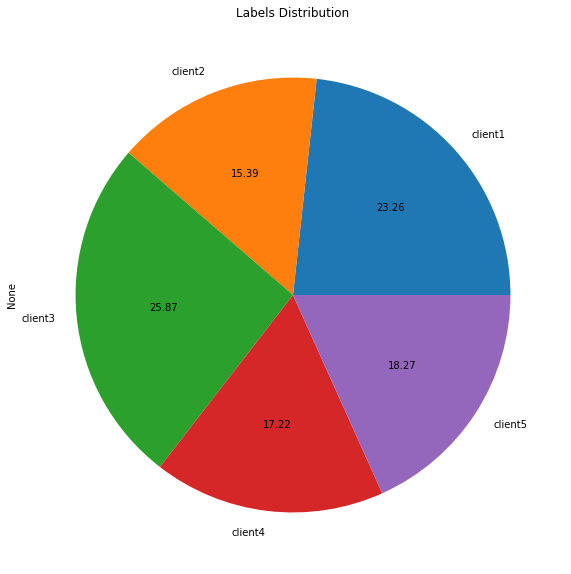

In [ ]:
# Plot the data instances percentage for each client
plt.title("Labels Distribution")
df_merged.groupby('client').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplly Min-max normalization for each feature
def normalization(df_ori):
    df_rst = df_ori.groupby('target').apply(normalization_helper)
    return df_rst

def normalization_helper(sub_df):
    scaler = MinMaxScaler()
    col_list = sub_df.columns.tolist()
    for i in range(len(col_list) - 2):
        col_name = col_list[i]
        scaled_col = scaler.fit_transform(sub_df[col_name].values.reshape(-1,1))
        sub_df[col_name] = scaled_col
    return sub_df

df_normalized = normalization(df_ori=df_merged)

df_normalized.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.448627,0.000000,0.000000,0.000000,0.000000,0.000000,0.581253,0.470035,benign,client1
1,0.000000,0.211101,0.000000,0.000000,0.211400,0.000000,0.000000,0.213965,0.000000,0.000000,...,0.448627,0.005781,0.201605,0.006917,0.201605,0.000046,0.581253,0.470035,benign,client1
2,0.010955,0.215739,0.000073,0.007908,0.215912,0.000076,0.004501,0.218399,0.000076,0.001615,...,0.448627,0.007117,0.204045,0.013267,0.204045,0.000170,0.581253,0.470035,benign,client1
3,0.000000,0.198895,0.000000,0.000000,0.199176,0.000000,0.000000,0.201593,0.000000,0.000000,...,0.448627,0.000000,0.196454,0.000000,0.196454,0.000000,0.581253,0.470035,benign,client1
4,0.008686,0.080521,0.037591,0.006881,0.088127,0.040148,0.004297,0.096914,0.040639,0.001607,...,0.448627,0.000000,0.000000,0.000000,0.000000,0.000000,0.581253,0.470035,benign,client1


In [ ]:
df_client = df_normalized.sample(frac=1, random_state=42, axis=0).reset_index(drop=True)
df_client.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000882,0.004547,1.061163e-05,0.002266,0.005244,4.035049e-05,0.005007,0.007116,1.264442e-04,0.015243,...,0.448627,0.023649,0.004255,8.516872e-08,0.039827,0.000458,0.581253,0.470035,benign,client3
1,0.143175,0.923129,2.844967e-01,0.187705,0.817384,6.132709e-01,0.332551,0.735498,9.249250e-01,0.520727,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,mirai_udp,client4
2,0.215386,0.835195,2.846743e-01,0.221013,0.673042,7.153496e-01,0.276447,0.340406,8.764978e-01,0.386094,...,0.000000,0.000000,0.291667,0.000000e+00,0.291667,0.000000,0.000000,0.000000,mirai_syn,client4
3,0.361131,0.714834,8.158901e-01,0.455403,0.672679,8.882172e-01,0.662679,0.752109,9.089640e-01,0.914768,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,mirai_udp,client3
4,0.025538,0.021541,1.848291e-18,0.017340,0.021571,7.720750e-17,0.009282,0.021832,6.035961e-08,0.007250,...,0.448627,0.004173,0.020600,7.732184e-03,0.033632,0.000058,0.581252,0.458546,benign,client4


In [ ]:
# Conver the string target labels to number, 0 for benign, 1 for mirai_ack and so on
def covert_target_to_num_val(df):
    target_seq_list = ['benign', 'mirai_ack', 'mirai_scan', 'mirai_syn', 'mirai_udp']
    df['target']=df['target'].apply(lambda x : target_seq_list.index(x))
    return df

df_client= covert_target_to_num_val(df=df_client)
df_client.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000882,0.004547,1.061163e-05,0.002266,0.005244,4.035049e-05,0.005007,0.007116,1.264442e-04,0.015243,...,0.448627,0.023649,0.004255,8.516872e-08,0.039827,0.000458,0.581253,0.470035,0,client3
1,0.143175,0.923129,2.844967e-01,0.187705,0.817384,6.132709e-01,0.332551,0.735498,9.249250e-01,0.520727,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,4,client4
2,0.215386,0.835195,2.846743e-01,0.221013,0.673042,7.153496e-01,0.276447,0.340406,8.764978e-01,0.386094,...,0.000000,0.000000,0.291667,0.000000e+00,0.291667,0.000000,0.000000,0.000000,3,client4
3,0.361131,0.714834,8.158901e-01,0.455403,0.672679,8.882172e-01,0.662679,0.752109,9.089640e-01,0.914768,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,4,client3
4,0.025538,0.021541,1.848291e-18,0.017340,0.021571,7.720750e-17,0.009282,0.021832,6.035961e-08,0.007250,...,0.448627,0.004173,0.020600,7.732184e-03,0.033632,0.000058,0.581252,0.458546,0,client4


In [ ]:
# From the merged dataset split to each client dataframe 

df_client1 = df_client[df_client['client'] == 'client1']
df_client2 = df_client[df_client['client'] == 'client2']
df_client3 = df_client[df_client['client'] == 'client3']
df_client4 = df_client[df_client['client'] == 'client4']
df_client5 = df_client[df_client['client'] == 'client5']

df_clients_list = []

df_clients_list.append(df_client1)
df_clients_list.append(df_client2)
df_clients_list.append(df_client3)
df_clients_list.append(df_client4)
df_clients_list.append(df_client5)

df_clients_list[1]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
6,0.336081,2.613672e-06,0.000028,0.320875,0.000027,0.000901,0.467263,0.000146,0.004524,0.813879,...,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2,client2
12,0.375477,9.249611e-01,0.178256,0.423540,0.878717,0.429475,0.553701,0.797550,0.725040,0.741375,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
25,0.344775,6.573368e-01,0.497118,0.389454,0.742966,0.617467,0.581667,0.790478,0.642290,0.761627,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
36,0.641389,9.395105e-01,0.228679,0.727560,0.897518,0.391081,0.843436,0.939098,0.609063,0.861804,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4,client2
46,0.349291,8.656528e-01,0.455133,0.432693,0.819792,0.599427,0.674783,0.886046,0.711179,0.950351,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4,client2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126571,0.529833,1.160798e-07,0.000002,0.474946,0.000004,0.000251,0.565729,0.000074,0.004599,0.845618,...,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2,client2
3126576,0.643962,8.255844e-01,0.575528,0.749677,0.780136,0.685557,0.872898,0.747890,0.753616,0.926877,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,1,client2
3126578,0.360641,7.995970e-01,0.338674,0.434537,0.775080,0.562796,0.597507,0.762867,0.701540,0.739116,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
3126582,0.368300,7.379947e-01,0.774011,0.430993,0.783207,0.693546,0.662547,0.895742,0.697262,0.962946,...,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4,client2


In [ ]:
df_clients_partial_list = []
# In this step, randomly sample 20% of data for each client dataframe
for i in range(len(df_clients_list)):
    df_client = df_clients_list[i]
    df_client_partial = df_client.sample(frac=0.2, random_state=1)
    df_clients_partial_list.append(df_client_partial)

df_clients_partial_list[i]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
2298236,0.563006,0.477450,0.997680,0.497114,0.515275,0.999222,0.455666,0.620349,0.994286,0.538898,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
1921852,0.344250,0.342060,0.899948,0.360928,0.408057,0.963511,0.433791,0.578700,0.999654,0.571206,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
2681313,0.663340,0.000184,0.001402,0.624770,0.000185,0.004438,0.642304,0.000237,0.007385,0.857924,...,0.000000,0.000000,2.775558e-17,0.000000,2.775558e-17,0.000000,0.000000,0.000000,2,client5
818728,0.159848,0.854991,0.496805,0.216080,0.742791,0.775653,0.350638,0.699407,0.955331,0.549307,...,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,4,client5
2462577,0.666282,0.084799,0.118098,0.555174,0.083480,0.120576,0.376101,0.082043,0.116642,0.167548,...,0.448627,0.002676,1.607589e-01,0.449972,1.674234e-01,0.196007,0.581253,0.470035,0,client5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315567,0.307679,0.000002,0.000018,0.346666,0.000018,0.000569,0.478305,0.000179,0.006790,0.831229,...,0.000000,0.000000,2.775558e-17,0.000000,2.775558e-17,0.000000,0.000000,0.000000,2,client5
1843661,0.123404,0.967746,0.029330,0.152756,0.982058,0.048679,0.301782,0.914059,0.304744,0.390946,...,0.000000,0.000000,2.916667e-01,0.000000,2.916667e-01,0.000000,0.000000,0.000000,3,client5
696284,0.286408,0.912262,0.319883,0.291152,0.865153,0.485798,0.368338,0.791814,0.861489,0.530694,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
25307,0.203859,0.383164,0.945181,0.285781,0.466235,0.994205,0.471189,0.642535,0.987158,0.590048,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5


In [ ]:
# Under sampling for each client to balance the dataset
def under_sample(df_list):
    df_rst_list = []
    # The sampling is based on the target, for target have the smallest number of instances, no changes, rest of targets reduce to 50%
    for i in range(len(df_list)):
        df = df_list[i]
        # For example, since for client1, target 1 have less instances, it will not change, instances with other lables will reduce
        if i == 0:
            df_rst_c1_af = df[(df['target'] != 0) & (df['target'] != 1) & (df['target'] != 3)].sample(frac=0.5, random_state=1).reset_index(drop=True)
            df_rst_c1_be1 = df[(df['target'] == 1)]
            df_rst_c1_be2 = df[(df['target'] == 0)]
            df_rst_c1_be3 = df[(df['target'] == 3)]
            df_rst_c1 = pd.concat([df_rst_c1_af, df_rst_c1_be1, df_rst_c1_be2, df_rst_c1_be3])
        if i == 1:
            df_rst_c2_af = df[(df['target'] != 0) & (df['target'] != 1)].sample(frac=0.5, random_state=1).reset_index(drop=True)
            df_rst_c2_be1 = df[(df['target'] == 1)]
            df_rst_c2_be2 = df[(df['target'] == 0)]
            df_rst_c2 = pd.concat([df_rst_c2_af, df_rst_c2_be1, df_rst_c2_be2])
        if i == 2:
            df_rst_c3_af = df[(df['target'] != 2) & (df['target'] != 1)].sample(frac=0.5, random_state=1).reset_index(drop=True)
            df_rst_c3_be1 = df[(df['target'] == 2)]
            df_rst_c3_be2 = df[(df['target'] == 1)]
            df_rst_c3 = pd.concat([df_rst_c3_af, df_rst_c3_be1, df_rst_c3_be2])
        if i == 3:
            df_rst_c4_af = df[(df['target'] != 1) & (df['target'] != 3)].sample(frac=0.5, random_state=1).reset_index(drop=True)
            df_rst_c4_be1 = df[(df['target'] == 1)]
            df_rst_c4_be2 = df[(df['target'] == 3)]
            df_rst_c4 = pd.concat([df_rst_c4_af, df_rst_c4_be1, df_rst_c4_be2])
        if i == 4:
            df_rst_c5_af = df[(df['target'] != 1) & (df['target'] != 4) & (df['target'] != 3)].sample(frac=0.5, random_state=1).reset_index(drop=True)
            df_rst_c5_be1 = df[(df['target'] == 1)]
            df_rst_c5_be2 = df[(df['target'] == 4)]
            df_rst_c5_be3 = df[(df['target'] == 3)]
            df_rst_c5 = pd.concat([df_rst_c5_af, df_rst_c5_be1, df_rst_c5_be2, df_rst_c5_be3])

    df_rst_list.append(df_rst_c1)
    df_rst_list.append(df_rst_c2)
    df_rst_list.append(df_rst_c3)
    df_rst_list.append(df_rst_c4)
    df_rst_list.append(df_rst_c5)
    return df_rst_list

In [ ]:
# Display the number of instances for each lables after undersample
df_cpy = df_clients_partial_list.copy()
df_rst = under_sample(df_cpy)
df_rst[0]['target'].value_counts()

3    24716
4    23627
2    21483
1    20709
0     9826
Name: target, dtype: int64

In [ ]:
# Counts the number of instances for each client before traning
df_counts = pd.concat(df_rst)
df_counts['client'].value_counts()

client3    110639
client1    100361
client5     84938
client4     66354
client2     60833
Name: client, dtype: int64

In [ ]:
# Drop the col client because we will not use it in training
df_clients_list_dropped = []
for clients in df_rst:
    clients_dropped = clients.drop('client', axis=1)
    df_clients_list_dropped.append(clients_dropped)

df_clients_list_dropped[0]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,0.165720,0.000001,0.000016,0.200677,0.000016,0.000559,0.449677,0.000072,0.002389,0.941000,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
1,0.310631,0.920064,0.295457,0.400588,0.846188,0.539621,0.626833,0.835091,0.801753,0.907290,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
2,0.297369,0.874485,0.440116,0.393043,0.799141,0.657529,0.626608,0.811440,0.836461,0.907568,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
3,0.513441,0.419354,0.973874,0.555361,0.488623,0.999052,0.700484,0.684309,0.966005,0.949875,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
4,0.313615,0.938567,0.231988,0.391245,0.865409,0.486427,0.611636,0.842575,0.790050,0.907263,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475872,0.473693,0.334347,0.505411,0.474806,0.450858,0.805182,0.590451,0.590553,0.937878,0.587513,...,0.0,0.0,0.0,2.220446e-16,0.0,2.220446e-16,0.0,0.0,0.0,3
499293,0.354403,0.657143,0.497269,0.413304,0.641119,0.746263,0.580650,0.650729,0.883319,0.716435,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
464275,0.504212,0.386493,0.537103,0.502117,0.479392,0.811429,0.606937,0.601585,0.929525,0.612011,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
165132,0.386003,0.634081,0.514017,0.432063,0.628615,0.757397,0.586079,0.649363,0.884545,0.752741,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3


In [ ]:
# Split the dataframe to train and test for each client the ratio is 80% for training and 20% for testing
df_client_train_ori_list = []
df_client_test_list = []
for i in range(len(df_clients_list_dropped)):
    df_client_train_ori, df_client_test_ori = train_test_split(df_clients_list_dropped[i], train_size=0.8, random_state=42, stratify=df_clients_list_dropped[i]['target'])

    df_client_test = df_client_test_ori.reset_index(drop=True)
    df_client_train_ori_list.append(df_client_train_ori)
    df_client_test_list.append(df_client_test)

df_client_train_ori_list[0]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
22081,0.494720,5.160787e-01,9.989916e-01,0.539316,5.446284e-01,0.993535,0.690593,0.704561,0.951837,0.919084,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
30413,0.385767,5.144349e-01,9.990246e-01,0.440769,6.044551e-01,0.960076,0.630423,0.752199,0.908591,0.710322,...,0.0,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4
18864,0.712519,4.138628e-11,1.521373e-09,0.618263,3.672561e-08,0.000004,0.691958,0.000020,0.002086,0.982767,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
36856,0.507680,4.787274e-01,9.978893e-01,0.568629,5.299277e-01,0.997206,0.718465,0.698469,0.956330,0.919442,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
18092,0.298434,9.196032e-01,2.970008e-01,0.382538,8.384694e-01,0.560163,0.609254,0.819910,0.824419,0.904290,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32541,0.758947,2.606603e-08,2.994392e-07,0.653671,1.083268e-06,0.000039,0.713134,0.000028,0.000914,0.987044,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
24271,0.327376,8.205255e-01,5.899180e-01,0.421936,7.497431e-01,0.762634,0.642440,0.785110,0.871298,0.915688,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
2180332,0.286872,7.605978e-01,3.915281e-01,0.357378,7.133267e-01,0.661942,0.540469,0.674830,0.851081,0.739058,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
15266,0.466459,2.819428e-01,8.096018e-01,0.512034,4.121890e-01,0.966737,0.677651,0.661505,0.979005,0.914821,...,0.0,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4


In [ ]:
# For traning dataset drop the data belong the the specific target to simulate unknown attack
# (Traning does not no the target but testing we will test it)
df_client_train_list = []
for i in range(len(df_client_train_ori_list)):
    df_client_train_ori = df_client_train_ori_list[i]
    df_client_train = df_client_train_ori[df_client_train_ori['target'] != i].reset_index(drop=True)
    df_client_train_list.append(df_client_train)

df_client_train_list[0]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,0.494720,5.160787e-01,9.989916e-01,0.539316,5.446284e-01,0.993535,0.690593,0.704561,0.951837,0.919084,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
1,0.385767,5.144349e-01,9.990246e-01,0.440769,6.044551e-01,0.960076,0.630423,0.752199,0.908591,0.710322,...,0.0,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4
2,0.712519,4.138628e-11,1.521373e-09,0.618263,3.672561e-08,0.000004,0.691958,0.000020,0.002086,0.982767,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
3,0.507680,4.787274e-01,9.978893e-01,0.568629,5.299277e-01,0.997206,0.718465,0.698469,0.956330,0.919442,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
4,0.298434,9.196032e-01,2.970008e-01,0.382538,8.384694e-01,0.560163,0.609254,0.819910,0.824419,0.904290,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72422,0.758947,2.606603e-08,2.994392e-07,0.653671,1.083268e-06,0.000039,0.713134,0.000028,0.000914,0.987044,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
72423,0.327376,8.205255e-01,5.899180e-01,0.421936,7.497431e-01,0.762634,0.642440,0.785110,0.871298,0.915688,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
72424,0.286872,7.605978e-01,3.915281e-01,0.357378,7.133267e-01,0.661942,0.540469,0.674830,0.851081,0.739058,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
72425,0.466459,2.819428e-01,8.096018e-01,0.512034,4.121890e-01,0.966737,0.677651,0.661505,0.979005,0.914821,...,0.0,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4


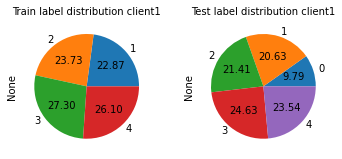

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Train label distribution client1", fontsize=10)
df_client_train_list[0].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))
plt.subplots_adjust(left=0.1, right=1.0, top=0.9, bottom=0.1)

plt.subplot(2, 2, 2)
plt.title("Test label distribution client1", fontsize=10)
df_client_test_list[0].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

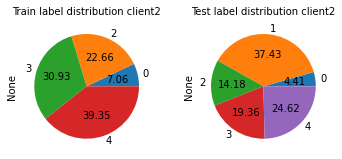

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Train label distribution client2", fontsize=10)
df_client_train_list[1].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))
plt.subplots_adjust(left=0.1, right=1.0, top=0.9, bottom=0.1)

plt.subplot(2, 2, 2)
plt.title("Test label distribution client2", fontsize=10)
df_client_test_list[1].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

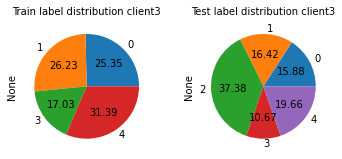

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Train label distribution client3", fontsize=10)
df_client_train_list[2].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))
plt.subplots_adjust(left=0.1, right=1.0, top=0.9, bottom=0.1)

plt.subplot(2, 2, 2)
plt.title("Test label distribution client3", fontsize=10)
df_client_test_list[2].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

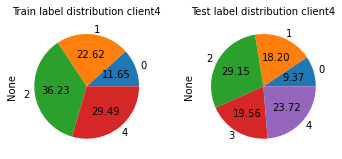

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Train label distribution client4", fontsize=10)
df_client_train_list[3].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))
plt.subplots_adjust(left=0.1, right=1.0, top=0.9, bottom=0.1)

plt.subplot(2, 2, 2)
plt.title("Test label distribution client4", fontsize=10)
df_client_test_list[3].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

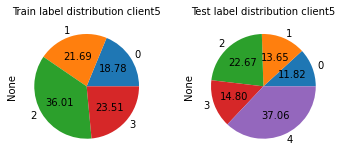

In [ ]:
plt.subplot(2, 2, 1)
plt.title("Train label distribution client5", fontsize=10)
df_client_train_list[4].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))
plt.subplots_adjust(left=0.1, right=1.0, top=0.9, bottom=0.1)

plt.subplot(2, 2, 2)
plt.title("Test label distribution client5", fontsize=10)
df_client_test_list[4].groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(5,5))

In [ ]:
# Class to create own customelized dataset
import torch
class build_torch_dataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        current_sample = self.data[idx, :]
        current_target = self.targets[idx]
        return (torch.tensor(current_sample, dtype=torch.float), torch.tensor(current_target, dtype=torch.long))

In [ ]:
# Convert dataframe to the torch dataset
def covert_df_to_torch_dataset(df):

    # Extra the features and the targets
    df_data = df.iloc[:, 0: len(df.columns) - 1]
    df_target= df.iloc[:, len(df.columns) - 1: len(df.columns)]

    # Covert the dataframe to numpy array first
    ds_torch_data = df_data.to_numpy()
    ds_torch_target = df_target.to_numpy()
    
    # Covert labels from 2D to 1D
    ds_torch_target_list = ds_torch_target.tolist()
    ds_torch_target_1D = []
    for i in range(len(ds_torch_target_list)):
        ds_torch_target_1D = np.append(ds_torch_target_1D, ds_torch_target_list[i][0])

    ds_torch = build_torch_dataset(ds_torch_data, ds_torch_target_1D)
    return ds_torch

In [ ]:
ds_torch_train_client_list = []
ds_torch_test_client_list = []

# Add to torch dataset of each client to list
for i in range(len(df_client_train_list)):
    df_client_train = df_client_train_list[i]
    df_client_test = df_client_test_list[i]

    ds_torch_train_client = covert_df_to_torch_dataset(df=df_client_train)
    ds_torch_test_client = covert_df_to_torch_dataset(df=df_client_test)

    ds_torch_train_client_list.append(ds_torch_train_client)
    ds_torch_test_client_list.append(ds_torch_test_client)

ds_torch_train_client_list[0]

In [ ]:
train_loaders_list = []
test_loaders_list = []
# Convert the traing and testing torch dataset to dataloaders and add them to list
for i in range(len(ds_torch_train_client_list)):

    ds_torch_train_client = ds_torch_train_client_list[i]
    ds_torch_test_client = ds_torch_test_client_list[i]

    train_loader_client = torch.utils.data.DataLoader(ds_torch_train_client, batch_size = 12, drop_last=True)
    test_loader_client = torch.utils.data.DataLoader(ds_torch_test_client, batch_size = 12, drop_last=True)

    train_loaders_list.append(train_loader_client)
    test_loaders_list.append(test_loader_client)

In [ ]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(115, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 5),
            nn.Softmax(dim=1)
        )
    def forward(self, features):
        x = self.flatten(features)
        logits = self.linear_relu_stack(x)
        return logits

print(NeuralNetwork().to('cpu'))

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=115, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=5, bias=True)
    (11): Softmax(dim=1)
  )
)


In [ ]:
# Function to perform the evluation of each model based on the confuse matrix
def evaluation(confmat_glb):

    # Display the confuse matrix
    print(confmat_glb)

    # Achieve the TP, FN, FP for benign
    tp_benign = confmat_glb[0, 0].item()
    fn_benign = confmat_glb[0, 1].item() + confmat_glb[0, 2].item() + confmat_glb[0, 3].item() + confmat_glb[0, 4].item()
    fp_benign = confmat_glb[1, 0].item() + confmat_glb[2, 0].item() + confmat_glb[3, 0].item() + confmat_glb[4, 0].item()

    # Achieve the TP, FN, FP for ACK
    tp_ack = confmat_glb[1, 1].item()
    fn_ack = confmat_glb[1, 0].item() + confmat_glb[1, 2].item() + confmat_glb[1, 3].item() + confmat_glb[1, 4].item()
    fp_ack = confmat_glb[0, 1].item() + confmat_glb[2, 1].item() + confmat_glb[3, 1].item() + confmat_glb[4, 1].item()

    # Achieve the TP, FN, FP for Scan
    tp_scan = confmat_glb[2, 2].item()
    fn_scan = confmat_glb[2, 0].item() + confmat_glb[2, 1].item() + confmat_glb[2, 3].item() + confmat_glb[2, 4].item()
    fp_scan = confmat_glb[0, 2].item() + confmat_glb[1, 2].item() + confmat_glb[3, 2].item() + confmat_glb[4, 2].item()

    # Achieve the TP, FN, FP for SYN
    tp_syn = confmat_glb[3, 3].item()
    fn_syn= confmat_glb[3, 0].item() + confmat_glb[3, 1].item() + confmat_glb[3, 2].item() + confmat_glb[3, 4].item()
    fp_syn = confmat_glb[0, 3].item() + confmat_glb[1, 3].item() + confmat_glb[2, 3].item() + confmat_glb[4, 3].item()

    # Achieve the TP, FN, FP for UDDP
    tp_udp = confmat_glb[4, 4].item()
    fn_udp= confmat_glb[4, 0].item() + confmat_glb[4, 1].item() + confmat_glb[4, 2].item() + confmat_glb[4, 3].item()
    fp_udp = confmat_glb[0, 4].item() + confmat_glb[1, 4].item() + confmat_glb[2, 4].item() + confmat_glb[3, 4].item()

    # calcualte recall, precision and f1 score for each label respective
    recall_benign, precision_benign, f1_score_benign = evaluation_helper(tp_benign, fn_benign, fp_benign)
    recall_ack, precision_ack, f1_score_ack = evaluation_helper(tp_ack, fn_ack, fp_ack)
    recall_scan, precision_scan, f1_score_scan = evaluation_helper(tp_scan, fn_scan, fp_scan)
    recall_syn, precision_syn, f1_score_syn = evaluation_helper(tp_syn, fn_syn, fp_syn)
    recall_udp, precision_udp, f1_score_udp = evaluation_helper(tp_udp, fn_udp, fp_udp)

    # Add them to a 2D list
    return [[recall_benign, precision_benign, f1_score_benign], [ recall_ack, precision_ack, f1_score_ack],
            [recall_scan, precision_scan, f1_score_scan], [recall_syn, precision_syn, f1_score_syn], [recall_udp, precision_udp, f1_score_udp]]

# Helper function to calculate recall precision and f1 score
def evaluation_helper(tp, fn, fp):
    if tp == 0:
        recall = 0
        precision = 0
        f1_score = 0
    else:
        recall = round((tp)/(tp + fn), 4)
        precision = round((tp)/(tp + fp), 4)
        f1_score = round(2 * ((precision * recall)/(precision + recall)), 4)


    return recall, precision, f1_score

# Function to display the results
def display_evaluation(eval_list):
    print()
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    for i in range(len(eval_list)):
        if i == 0:
            print('benign:', end = ' ')
        if i == 1:
            print('ack:', end = ' ')
        if i == 2:
            print('scan:', end = ' ')
        if i == 3:
            print('syn:', end = ' ')
        if i == 4:
            print('udp:', end = ' ')
        
        print(eval_list[i])
        

In [ ]:
# Function to train the model
# Citation: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
def train(dataloader, model, loss_fn, optimizer, epoch):
    for i in range(epoch):
        model.train()
        for tup in dataloader:

            X = tup[0]
            y = tup[1]

            pred = model(X)
            loss = loss_fn(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 5.2 MB/s 


In [ ]:
# Function to test the model
# Citations: https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
from torchmetrics import Recall, ConfusionMatrix
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, total = 0, 0
    recall_glb = 0.0
    recall_model = Recall(task="multiclass", average='macro', num_classes=5)
    confmat_glb = torch.zeros(5, 5, dtype=torch.int64)
    with torch.no_grad():
        for tup in dataloader:
            X = tup[0]
            y = tup[1]

            # calculate y_pred
            pred = model(X)

            test_loss += loss_fn(pred, y).item()

            # Find the specific target
            pred_int = pred.argmax(1)
            recall_local = recall_model(pred_int, y)

            recall_glb += recall_local

            total += y.size(0)

            # Generate the local confusion matrix for every batchs
            confmat = ConfusionMatrix(task="multiclass", num_classes=5)

            # Generate the global confusion
            confmat_local = confmat(pred_int, y)
            confmat_glb += confmat_local


    recall_glb /= size
    recall_glb = recall_glb * 12
    test_loss /= size

    eval_list = evaluation(confmat_glb)
    display_evaluation(eval_list)
    
    return test_loss, recall_glb

In [ ]:
# Function to define training and testing iterations, each iterations will run five epochs
def train_test_itr(epochs, train_loader, test_loader):
    loss_fn = nn.CrossEntropyLoss()
    model_dnn = NeuralNetwork()
    optimizer = torch.optim.SGD(model_dnn.parameters(), lr=1e-3)
    for t in range(epochs):
        print(f"Epoch {t + 1}\n----------------------------------------------")
        train(train_loader, model_dnn, loss_fn, optimizer, epoch=5)
        test(test_loader, model_dnn, loss_fn)

In [ ]:
# LDL method
import datetime
def LDL_rst(e):
    for i in range(len(train_loaders_list)):
        print(f"Client {i + 1}\n--------------------------------------------------------------------------------------------")
        print()
        train_loader_client = train_loaders_list[i]
        test_loader_client = test_loaders_list[i]
        train_test_itr(epochs=e, train_loader=train_loader_client, test_loader=test_loader_client)

starttime_LDL = datetime.datetime.now()

LDL_rst(e = 5)

endtime_LDL = datetime.datetime.now()

time_LDL = (endtime_LDL - starttime_LDL).seconds

time_LDL

Client 1
--------------------------------------------------------------------------------------------

Epoch 1
----------------------------------------------


<ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  return (torch.tensor(current_sample, dtype=torch.float), torch.tensor(current_target, dtype=torch.long))


tensor([[   0,    0,    0, 1965,    0],
        [   0,    0,    0, 4140,    0],
        [   0,    0,    0, 4294,    0],
        [   0,    0,    0, 4940,    0],
        [   0,    0,    0, 4725,    0]])

The display will followed by format: Type: [Recall, precision, f1_score]
benign: [0, 0, 0]
ack: [0, 0, 0]
scan: [0, 0, 0]
syn: [1.0, 0.2462, 0.3951]
udp: [0, 0, 0]
Epoch 2
----------------------------------------------
tensor([[   0,    0,    0, 1965,    0],
        [   0,    0,    0, 4140,    0],
        [   0,    0,    0, 4294,    0],
        [   0,    0,    0, 4940,    0],
        [   0,    0,    0, 4725,    0]])

The display will followed by format: Type: [Recall, precision, f1_score]
benign: [0, 0, 0]
ack: [0, 0, 0]
scan: [0, 0, 0]
syn: [1.0, 0.2462, 0.3951]
udp: [0, 0, 0]
Epoch 3
----------------------------------------------
tensor([[   0,    0, 1965,    0,    0],
        [   0,    0,    0,  464, 3676],
        [   0,    0, 4294,    0,    0],
        [   0,    0,    0, 4940,    0]

877

In [ ]:
!pip install -q flwr[simulation] torch torchvision matplotlib

     |████████████████████████████████| 121 kB 4.7 MB/s 
     |████████████████████████████████| 60.2 MB 1.2 MB/s 
     |████████████████████████████████| 8.8 MB 48.2 MB/s 
     |████████████████████████████████| 4.1 MB 8.4 MB/s 
     |████████████████████████████████| 90 kB 8.9 MB/s 
     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 128 kB 50.0 MB/s 
     |████████████████████████████████| 3.0 MB 37.8 MB/s 
     |████████████████████████████████| 201 kB 70.0 MB/s 
     |████████████████████████████████| 280 kB 72.6 MB/s 
     |████████████████████████████████| 58 kB 3.1 MB/s 
     |████████████████████████████████| 468 kB 48.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.48.2 requires grpcio>=1.48.2, but you have grpcio 1.43.0 which is incompatible.
google-cloud-bigquery 3.3.6 requires grpc

In [ ]:
# Citation: https://flower.dev/docs/tutorial/Flower-1-Intro-to-FL-PyTorch.html
import flwr as fl

# Function to get and set the model parameters from the DNN model
def get_parameters(net):
    return [val.cpu().numpy() for _, val in net.state_dict().items()]

def set_parameters(net, parameters):
    params_dict = zip(net.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.Tensor(v) for k, v in params_dict})
    net.load_state_dict(state_dict, strict=True)

In [ ]:
# Citation: https://flower.dev/docs/tutorial/Flower-1-Intro-to-FL-PyTorch.html

# Define the class of clients (IoT-edge devices)
class FlowerClient(fl.client.NumPyClient):
    def __init__(self, net, trainloader, valloader, loss_func, optimizer, epoch):
        self.net = net
        self.trainloader = trainloader
        self.valloader = valloader
        self.loss_func = loss_func
        self.optimizer = optimizer
        self.epoch = epoch

    def get_parameters(self, config):
        return get_parameters(self.net)

    def fit(self, parameters, config):
        set_parameters(self.net, parameters)
        train(self.trainloader, self.net, self.loss_func, self.optimizer, self.epoch)
        return get_parameters(self.net), len(self.trainloader), {}

    def evaluate(self, parameters, config):
        set_parameters(self.net, parameters)
        loss, accuracy = test(self.valloader, self.net, self.loss_func)
        return float(loss), len(self.valloader), {"accuracy": float(accuracy)}

In [ ]:
#Citation: https://flower.dev/docs/tutorial/Flower-1-Intro-to-FL-PyTorch.html

# Add the training, testing loader, loss function, DNN model to each client
from torch.optim import optimizer
def client_fn(cid):

    trainloader = train_loaders_list[int(cid)]
    valloader = test_loaders_list[int(cid)]
    loss_fun = nn.CrossEntropyLoss()
    model_dnn = NeuralNetwork()
    optimizer = torch.optim.SGD(model_dnn.parameters(), lr=1e-3)

    return FlowerClient(model_dnn, trainloader, valloader, loss_fun, optimizer, epoch=10)

In [ ]:
# Citation: https://flower.dev/docs/tutorial/Flower-1-Intro-to-FL-PyTorch.html
from collections import OrderedDict
from typing import List, Tuple

import flwr as fl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from flwr.common import Metrics
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10

In [ ]:
# Citation: https://flower.dev/docs/tutorial/Flower-1-Intro-to-FL-PyTorch.html


starttime_FDL = datetime.datetime.now()

# Function to create FDL strategy, in our case all clients will be train and evluated
strategy = fl.server.strategy.FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=1.0,
        min_fit_clients=5,
        min_evaluate_clients=5,
        min_available_clients=5,
)


# Function to run the FDL_115
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy,
)

# Record traing time of FDL_115
endtime_FDL = datetime.datetime.now()

time_FDL = (endtime_FDL - starttime_FDL).seconds

INFO flower 2022-12-03 17:51:11,209 | app.py:140 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flower:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2022-12-03 17:51:14,839	INFO worker.py:1518 -- Started a local Ray instance.
INFO flower 2022-12-03 17:51:20,874 | app.py:174 | Flower VCE: Ray initialized with resources: {'CPU': 4.0, 'object_store_memory': 8012473958.0, 'memory': 16024947918.0, 'node:172.28.0.12': 1.0}
INFO:flower:Flower VCE: Ray initialized with resources: {'CPU': 4.0, 'object_store_memory': 8012473958.0, 'memory': 16024947918.0, 'node:172.28.0.12': 1.0}
INFO flower 2022-12-03 17:51:20,898 | server.py:86 | Initializing global parameters
INFO:flower:Initializing global parameters
INFO flower 2022-12-03 17:51:20,906 | server.py:270 | Requesting initial parameters from one random client
INFO:flower:Requesting initial parameters from one random client
INFO flower 2022-12-03 17:51:24,702 | server

(launch_and_evaluate pid=748) tensor([[   0,    0,    0,    0,  536],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 4551],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 1724],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 2354],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0, 0, 0]
(launch_and_evaluate pid=748) ack: [0, 0, 0]
(launch_and_evaluate pid=748) scan: [0, 0, 0]
(launch_and_evaluate pid=748) syn: [0, 0, 0]
(launch_and_evaluate pid=748) udp: [1.0, 0.2461, 0.395]


(launch_and_evaluate pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=750) tensor([[   0,    0,    0,    0, 2007],
(launch_and_evaluate pid=750)         [   0,    0,    0,    0, 2318],
(launch_and_evaluate pid=750)         [   0,    0,    0,    0, 3850],
(launch_and_evaluate pid=750)         [   0,    0,    0,    0, 2514],
(launch_and_evaluate pid=750)         [   0,    0,    0,    0, 6291]])
(launch_and_evaluate pid=750) 
(launch_and_evaluate pid=750) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=750) benign: [0, 0, 0]
(launch_and_evaluate pid=750) ack: [0, 0, 0]
(launch_and_evaluate pid=750) scan: [0, 0, 0]
(launch_and_evaluate pid=750) syn: [0, 0, 0]
(launch_and_evaluate pid=750) udp: [1.0, 0.3705, 0.5407]
(launch_and_evaluate pid=749) tensor([[   0,    0,    0,    0, 1965],
(launch_and_evaluate pid=749)         [   0,    0,    0,    0, 4140],
(launch_and_evaluate pid=749)         [   0,    0,    0,    0, 4294],
(launch_and_evaluate pid=749)         [   0,    0,    0,    0, 4

DEBUG flower 2022-12-03 17:54:37,551 | server.py:179 | evaluate_round 1 received 5 results and 0 failures
DEBUG:flower:evaluate_round 1 received 5 results and 0 failures
WARNING flower 2022-12-03 17:54:37,554 | fedavg.py:273 | No evaluate_metrics_aggregation_fn provided
DEBUG flower 2022-12-03 17:54:37,557 | server.py:215 | fit_round 2: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 2: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=748) tensor([[   0,    0,    0,    0, 1242],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 2414],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 3866],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 2594],
(launch_and_evaluate pid=748)         [   0,    0,    0,    0, 3144]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0, 0, 0]
(launch_and_evaluate pid=748) ack: [0, 0, 0]
(launch_and_evaluate pid=748) scan: [0, 0, 0]
(launch_and_evaluate pid=748) syn: [0, 0, 0]
(launch_and_evaluate pid=748) udp: [1.0, 0.2371, 0.3833]


(launch_and_fit pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=749) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=750) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipytho

(launch_and_evaluate pid=747) tensor([[   0,    0,  148,  388,    0],
(launch_and_evaluate pid=747)         [   0,    0,    0,  186, 4365],
(launch_and_evaluate pid=747)         [   0,    0, 1723,    1,    0],
(launch_and_evaluate pid=747)         [   0,    0,    0,  476, 1878],
(launch_and_evaluate pid=747)         [   0,    0,    0,   24, 2967]])
(launch_and_evaluate pid=747) 
(launch_and_evaluate pid=747) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=747) benign: [0, 0, 0]
(launch_and_evaluate pid=747) ack: [0, 0, 0]
(launch_and_evaluate pid=747) scan: [0.9994, 0.9209, 0.9585]
(launch_and_evaluate pid=747) syn: [0.2022, 0.4428, 0.2776]
(launch_and_evaluate pid=747) udp: [0.992, 0.3221, 0.4863]
(launch_and_evaluate pid=750) tensor([[   0,    0, 1116,  126,    0],
(launch_and_evaluate pid=750)         [   0,    0,    0,  383, 2031],
(launch_and_evaluate pid=750)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=750)   

DEBUG flower 2022-12-03 17:57:19,297 | server.py:179 | evaluate_round 2 received 5 results and 0 failures
DEBUG:flower:evaluate_round 2 received 5 results and 0 failures
DEBUG flower 2022-12-03 17:57:19,301 | server.py:215 | fit_round 3: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 3: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=747) tensor([[   0,    0, 1645,  362,    0],
(launch_and_evaluate pid=747)         [   0,    0,    1,  340, 1977],
(launch_and_evaluate pid=747)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=747)         [   0,    0,    0,  778, 1736],
(launch_and_evaluate pid=747)         [   0,    0,    0,    2, 6289]])
(launch_and_evaluate pid=747) 
(launch_and_evaluate pid=747) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=747) benign: [0, 0, 0]
(launch_and_evaluate pid=747) ack: [0, 0, 0]
(launch_and_evaluate pid=747) scan: [1.0, 0.7005, 0.8239]
(launch_and_evaluate pid=747) syn: [0.3095, 0.525, 0.3894]
(launch_and_evaluate pid=747) udp: [0.9997, 0.6288, 0.772]


(launch_and_fit pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=749) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=750) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipytho

(launch_and_evaluate pid=748) tensor([[ 528,    0,    1,    0,    7],
(launch_and_evaluate pid=748)         [   0, 1826,    0,    7, 2718],
(launch_and_evaluate pid=748)         [   0,    0, 1724,    0,    0],
(launch_and_evaluate pid=748)         [   0,  812,    0, 1516,   26],
(launch_and_evaluate pid=748)         [   0,   29,    0,    0, 2962]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0.9851, 1.0, 0.9925]
(launch_and_evaluate pid=748) ack: [0.4012, 0.6847, 0.5059]
(launch_and_evaluate pid=748) scan: [1.0, 0.9994, 0.9997]
(launch_and_evaluate pid=748) syn: [0.644, 0.9954, 0.782]
(launch_and_evaluate pid=748) udp: [0.9903, 0.5185, 0.6806]


(launch_and_evaluate pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=747) tensor([[1103,    0,  139,    0,    0],
(launch_and_evaluate pid=747)         [   0,  935,   25,  343, 1111],
(launch_and_evaluate pid=747)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=747)         [   0,  460,   17, 2115,    2],
(launch_and_evaluate pid=747)         [   0,  318,    0,    0, 2826]])
(launch_and_evaluate pid=747) 
(launch_and_evaluate pid=747) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=747) benign: [0.8881, 1.0, 0.9407]
(launch_and_evaluate pid=747) ack: [0.3873, 0.5458, 0.4531]
(launch_and_evaluate pid=747) scan: [1.0, 0.9553, 0.9771]
(launch_and_evaluate pid=747) syn: [0.8153, 0.8605, 0.8373]
(launch_and_evaluate pid=747) udp: [0.8989, 0.7174, 0.798]
(launch_and_evaluate pid=749) tensor([[1855,    0,  152,    0,    0],
(launch_and_evaluate pid=749)         [   0,  886,   33,  310, 1089],
(launch_and_evaluate pid=749)         [   0,    0, 3850,    0,    0],
(launch_

DEBUG flower 2022-12-03 17:59:58,794 | server.py:179 | evaluate_round 3 received 5 results and 0 failures
DEBUG:flower:evaluate_round 3 received 5 results and 0 failures
DEBUG flower 2022-12-03 17:59:58,798 | server.py:215 | fit_round 4: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 4: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=748) tensor([[1956,    0,    9,    0,    0],
(launch_and_evaluate pid=748)         [   0, 3622,    0,    0,  518],
(launch_and_evaluate pid=748)         [   0,    0, 4294,    0,    0],
(launch_and_evaluate pid=748)         [   0, 1530,    0, 3409,    1],
(launch_and_evaluate pid=748)         [   0,   13,    0,    0, 4712]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0.9954, 1.0, 0.9977]
(launch_and_evaluate pid=748) ack: [0.8749, 0.7013, 0.7785]
(launch_and_evaluate pid=748) scan: [1.0, 0.9979, 0.9989]
(launch_and_evaluate pid=748) syn: [0.6901, 1.0, 0.8166]
(launch_and_evaluate pid=748) udp: [0.9972, 0.9008, 0.9466]


(launch_and_fit pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=750) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=749) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(raylet) Spilled 5525 MiB, 36 ob

(launch_and_evaluate pid=748) tensor([[1238,    0,    4,    0,    0],
(launch_and_evaluate pid=748)         [   0, 1227,   56, 1050,   81],
(launch_and_evaluate pid=748)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=748)         [   0,    8,  111, 2474,    1],
(launch_and_evaluate pid=748)         [   0, 1324,    0,   20, 1800]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0.9968, 1.0, 0.9984]
(launch_and_evaluate pid=748) ack: [0.5083, 0.4795, 0.4935]
(launch_and_evaluate pid=748) scan: [1.0, 0.9576, 0.9783]
(launch_and_evaluate pid=748) syn: [0.9537, 0.6981, 0.8061]
(launch_and_evaluate pid=748) udp: [0.5725, 0.9564, 0.7163]


(launch_and_evaluate pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=750) tensor([[1996,    0,   11,    0,    0],
(launch_and_evaluate pid=750)         [   0, 1208,   57,  982,   71],
(launch_and_evaluate pid=750)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=750)         [   0,    2,   75, 2437,    0],
(launch_and_evaluate pid=750)         [   0, 2659,    0,   33, 3599]])
(launch_and_evaluate pid=750) 
(launch_and_evaluate pid=750) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=750) benign: [0.9945, 1.0, 0.9972]
(launch_and_evaluate pid=750) ack: [0.5211, 0.3122, 0.3905]
(launch_and_evaluate pid=750) scan: [1.0, 0.9642, 0.9818]
(launch_and_evaluate pid=750) syn: [0.9694, 0.706, 0.817]
(launch_and_evaluate pid=750) udp: [0.5721, 0.9807, 0.7226]
(launch_and_evaluate pid=747) tensor([[1957,    0,    8,    0,    0],
(launch_and_evaluate pid=747)         [   0, 4138,    0,    0,    2],
(launch_and_evaluate pid=747)         [   0,    0, 4294,    0,    0],
(launch_a

DEBUG flower 2022-12-03 18:03:31,641 | server.py:179 | evaluate_round 4 received 5 results and 0 failures
DEBUG:flower:evaluate_round 4 received 5 results and 0 failures
DEBUG flower 2022-12-03 18:03:31,645 | server.py:215 | fit_round 5: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 5: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=748) tensor([[ 528,    0,    1,    0,    7],
(launch_and_evaluate pid=748)         [   0, 3091,    0,    0, 1460],
(launch_and_evaluate pid=748)         [   0,    0, 1724,    0,    0],
(launch_and_evaluate pid=748)         [   0,  520,    0, 1789,   45],
(launch_and_evaluate pid=748)         [   0,    5,    0,    0, 2986]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0.9851, 1.0, 0.9925]
(launch_and_evaluate pid=748) ack: [0.6792, 0.8548, 0.7569]
(launch_and_evaluate pid=748) scan: [1.0, 0.9994, 0.9997]
(launch_and_evaluate pid=748) syn: [0.76, 1.0, 0.8636]
(launch_and_evaluate pid=748) udp: [0.9983, 0.6639, 0.7975]


(launch_and_fit pid=748) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=749) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=750) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=747) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=750) <ipytho

(launch_and_evaluate pid=747) tensor([[ 531,    0,    1,    0,    4],
(launch_and_evaluate pid=747)         [   0, 3264,    0,    0, 1287],
(launch_and_evaluate pid=747)         [   0,    0, 1724,    0,    0],
(launch_and_evaluate pid=747)         [   0,  288,    0, 1820,  246],
(launch_and_evaluate pid=747)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=747) 
(launch_and_evaluate pid=747) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=747) benign: [0.9907, 1.0, 0.9953]
(launch_and_evaluate pid=747) ack: [0.7172, 0.9189, 0.8056]
(launch_and_evaluate pid=747) scan: [1.0, 0.9994, 0.9997]
(launch_and_evaluate pid=747) syn: [0.7732, 1.0, 0.8721]
(launch_and_evaluate pid=747) udp: [1.0, 0.6606, 0.7956]


(launch_and_evaluate pid=747) <ipython-input-26-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=748) tensor([[1238,    0,    4,    0,    0],
(launch_and_evaluate pid=748)         [   0, 1289,   30, 1090,    5],
(launch_and_evaluate pid=748)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=748)         [   0,    4,   93, 2497,    0],
(launch_and_evaluate pid=748)         [   0, 1514,    0,   14, 1616]])
(launch_and_evaluate pid=748) 
(launch_and_evaluate pid=748) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=748) benign: [0.9968, 1.0, 0.9984]
(launch_and_evaluate pid=748) ack: [0.534, 0.4592, 0.4938]
(launch_and_evaluate pid=748) scan: [1.0, 0.9682, 0.9838]
(launch_and_evaluate pid=748) syn: [0.9626, 0.6934, 0.8061]
(launch_and_evaluate pid=748) udp: [0.514, 0.9969, 0.6783]


(raylet) Spilled 8433 MiB, 54 objects, write throughput 204 MiB/s.


(launch_and_evaluate pid=749) tensor([[1957,    0,    8,    0,    0],
(launch_and_evaluate pid=749)         [   0, 4138,    0,    0,    2],
(launch_and_evaluate pid=749)         [   0,    0, 4294,    0,    0],
(launch_and_evaluate pid=749)         [   0, 1443,    0, 3495,    2],
(launch_and_evaluate pid=749)         [   0,   10,    0,    0, 4715]])
(launch_and_evaluate pid=749) 
(launch_and_evaluate pid=749) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=749) benign: [0.9959, 1.0, 0.9979]
(launch_and_evaluate pid=749) ack: [0.9995, 0.7401, 0.8505]
(launch_and_evaluate pid=749) scan: [1.0, 0.9981, 0.999]
(launch_and_evaluate pid=749) syn: [0.7075, 1.0, 0.8287]
(launch_and_evaluate pid=749) udp: [0.9979, 0.9992, 0.9985]
(launch_and_evaluate pid=750) tensor([[3482,    2,    1,    9,   19],
(launch_and_evaluate pid=750)         [   0, 3633,    0,    0,    1],
(launch_and_evaluate pid=750)         [   0,    0, 8271,    0,    0],
(launch_and

DEBUG flower 2022-12-03 18:06:30,403 | server.py:179 | evaluate_round 5 received 5 results and 0 failures
DEBUG:flower:evaluate_round 5 received 5 results and 0 failures
INFO flower 2022-12-03 18:06:30,409 | server.py:144 | FL finished in 905.6934140200001
INFO:flower:FL finished in 905.6934140200001
INFO flower 2022-12-03 18:06:30,414 | app.py:192 | app_fit: losses_distributed [(1, 0.1308002672472279), (2, 0.10783089193829576), (3, 0.08960213197408294), (4, 0.08581109428292846), (5, 0.08664506596205021)]
INFO:flower:app_fit: losses_distributed [(1, 0.1308002672472279), (2, 0.10783089193829576), (3, 0.08960213197408294), (4, 0.08581109428292846), (5, 0.08664506596205021)]
INFO flower 2022-12-03 18:06:30,417 | app.py:193 | app_fit: metrics_distributed {}
INFO:flower:app_fit: metrics_distributed {}
INFO flower 2022-12-03 18:06:30,419 | app.py:194 | app_fit: losses_centralized []
INFO:flower:app_fit: losses_centralized []
INFO flower 2022-12-03 18:06:30,420 | app.py:195 | app_fit: metrics

(launch_and_evaluate pid=747) tensor([[2005,    0,    2,    0,    0],
(launch_and_evaluate pid=747)         [   0, 1259,   31, 1017,   11],
(launch_and_evaluate pid=747)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=747)         [   0,    0,   65, 2449,    0],
(launch_and_evaluate pid=747)         [   0, 3013,    0,   29, 3249]])
(launch_and_evaluate pid=747) 
(launch_and_evaluate pid=747) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=747) benign: [0.999, 1.0, 0.9995]
(launch_and_evaluate pid=747) ack: [0.5431, 0.2947, 0.3821]
(launch_and_evaluate pid=747) scan: [1.0, 0.9752, 0.9874]
(launch_and_evaluate pid=747) syn: [0.9741, 0.7007, 0.8151]
(launch_and_evaluate pid=747) udp: [0.5165, 0.9966, 0.6804]


In [ ]:
time_FDL

919

In [ ]:
# Select nine important features from the original 115 features

df_client_train_nine_features_list = []
df_client_test_nine_features_list = []

nine_featues = ['HH_jit_L5_mean', 'MI_dir_L0.1_weight', 'HH_jit_L0.01_mean', 'MI_dir_L0.01_mean', 'HH_jit_L0.01_variance',
                'HH_L0.01_radius', 'MI_dir_L0.01_weight', 'HH_jit_L1_variance', 'MI_dir_L0.01_variance', 'target']

for i in range(len(df_client_train_list)):
    df_client_train_nine_features = df_client_train_list[i].loc[:, nine_featues]
    df_client_train_nine_features_list.append(df_client_train_nine_features)

    df_client_test_nine_features = df_client_test_list[i].loc[:, nine_featues]
    df_client_test_nine_features_list.append(df_client_test_nine_features)

df_client_test_nine_features_list[0]

,HH_jit_L5_mean,MI_dir_L0.1_weight,HH_jit_L0.01_mean,MI_dir_L0.01_mean,HH_jit_L0.01_variance,HH_L0.01_radius,MI_dir_L0.01_weight,HH_jit_L1_variance,MI_dir_L0.01_variance,target
0,1.419176e-12,0.962887,2.491575e-06,0.654821,2.441994e-05,0.033360,0.958814,2.138031e-22,0.904495,1
1,3.391363e-09,0.004552,7.100172e-09,0.023113,1.376174e-16,0.001000,0.039832,3.179148e-19,0.000715,0
2,9.999995e-01,0.945008,9.999995e-01,0.652628,0.000000e+00,0.000000,0.989117,0.000000e+00,0.907192,1
3,9.999994e-01,0.958682,9.999994e-01,0.653401,0.000000e+00,0.000000,0.438005,0.000000e+00,0.906253,1
4,9.999984e-01,0.944318,9.999984e-01,0.000074,0.000000e+00,0.000000,0.418985,0.000000e+00,0.005040,2
...,...,...,...,...,...,...,...,...,...,...
20068,9.999986e-01,0.963733,9.999986e-01,0.000077,0.000000e+00,0.000000,0.909524,0.000000e+00,0.005395,2
20069,9.999994e-01,0.960407,9.999994e-01,0.654318,0.000000e+00,0.000000,0.778518,0.000000e+00,0.905114,1
20070,1.359983e-12,0.889624,7.419631e-05,0.653426,3.112137e-04,0.038441,0.284101,1.462617e-14,0.906225,1
20071,9.999985e-01,0.952361,9.999985e-01,0.000075,0.000000e+00,0.000000,0.849534,0.000000e+00,0.005245,2


In [ ]:
# Convert the dataframe to torch dataset

ds_torch_train_client_nine_features_list = []
ds_torch_test_client_nine_features_list = []

for i in range(len(df_client_train_nine_features_list)):
    df_client_train_nine_features = df_client_train_nine_features_list[i]
    df_client_test_nine_features = df_client_test_nine_features_list[i]

    ds_torch_train_client_nine_features = covert_df_to_torch_dataset(df=df_client_train_nine_features)
    ds_torch_test_client_nine_features = covert_df_to_torch_dataset(df=df_client_test_nine_features)

    ds_torch_train_client_nine_features_list.append(ds_torch_train_client_nine_features)
    ds_torch_test_client_nine_features_list.append(ds_torch_test_client_nine_features)

ds_torch_train_client_nine_features_list[0]

In [ ]:
# Convert dataset to dataloader

train_loaders_list_nine_features = []
test_loaders_list_nine_features = []
for i in range(len(ds_torch_train_client_nine_features_list)):

    ds_torch_train_client_nine_features = ds_torch_train_client_nine_features_list[i]
    ds_torch_test_client_nine_features = ds_torch_test_client_nine_features_list[i]

    train_loader_client_nine_features = torch.utils.data.DataLoader(ds_torch_train_client_nine_features, batch_size = 12, drop_last=True)
    test_loader_client_nine_features = torch.utils.data.DataLoader(ds_torch_test_client_nine_features, batch_size = 12, drop_last=True)

    train_loaders_list_nine_features.append(train_loader_client_nine_features)
    test_loaders_list_nine_features.append(test_loader_client_nine_features)

In [ ]:
# The archicture of DNN for FDL_9, only differences are the input neurons are 9 instead of 119

import torch.nn as nn
class NeuralNetwork_nineFeatures(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(9, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 5),
            nn.Softmax(dim=1)
        )
    def forward(self, features):
        x = self.flatten(features)
        logits = self.linear_relu_stack(x)
        return logits

print(NeuralNetwork_nineFeatures().to('cpu'))

NeuralNetwork_nineFeatures(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=9, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=5, bias=True)
    (11): Softmax(dim=1)
  )
)


In [ ]:

# Create clients for FDL_9
from torch.optim import optimizer
import datetime
def client_fn_nine_features(cid):

    trainloader = train_loaders_list_nine_features[int(cid)]
    valloader = test_loaders_list_nine_features[int(cid)]
    loss_fun = nn.CrossEntropyLoss()
    model_dnn = NeuralNetwork_nineFeatures()
    optimizer = torch.optim.SGD(model_dnn.parameters(), lr=1e-3)

    return FlowerClient(model_dnn, trainloader, valloader, loss_fun, optimizer, epoch=10)

In [ ]:

starttime_FDL_nine_featuers = datetime.datetime.now()

strategy_nine_features = fl.server.strategy.FedAvg(
        fraction_fit=1.0,
        fraction_evaluate=1.0,
        min_fit_clients=5,
        min_evaluate_clients=5,
        min_available_clients=5,
)

# Run FDL_9
fl.simulation.start_simulation(
    client_fn=client_fn_nine_features,
    num_clients=5,
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=strategy_nine_features
)

endtime_FDL_nine_featuers = datetime.datetime.now()

time_FDL_nine_featuers = (endtime_FDL_nine_featuers - starttime_FDL_nine_featuers).seconds

INFO flower 2022-12-03 18:22:05,930 | app.py:140 | Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
INFO:flower:Starting Flower simulation, config: ServerConfig(num_rounds=5, round_timeout=None)
2022-12-03 18:22:07,711	INFO worker.py:1518 -- Started a local Ray instance.
INFO flower 2022-12-03 18:22:09,501 | app.py:174 | Flower VCE: Ray initialized with resources: {'memory': 16049106126.0, 'object_store_memory': 8024553062.0, 'node:172.28.0.12': 1.0, 'CPU': 4.0}
INFO:flower:Flower VCE: Ray initialized with resources: {'memory': 16049106126.0, 'object_store_memory': 8024553062.0, 'node:172.28.0.12': 1.0, 'CPU': 4.0}
INFO flower 2022-12-03 18:22:09,507 | server.py:86 | Initializing global parameters
INFO:flower:Initializing global parameters
INFO flower 2022-12-03 18:22:09,515 | server.py:270 | Requesting initial parameters from one random client
INFO:flower:Requesting initial parameters from one random client
INFO flower 2022-12-03 18:22:11,284 | server

(launch_and_evaluate pid=545) tensor([[   0,    0,    1,    0,  535],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 4551],
(launch_and_evaluate pid=545)         [   0,    0, 1709,    0,   15],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 2354],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=545) 
(launch_and_evaluate pid=545) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=545) benign: [0, 0, 0]
(launch_and_evaluate pid=545) ack: [0, 0, 0]
(launch_and_evaluate pid=545) scan: [0.9913, 0.9994, 0.9953]
(launch_and_evaluate pid=545) syn: [0, 0, 0]
(launch_and_evaluate pid=545) udp: [1.0, 0.2863, 0.4452]
(launch_and_evaluate pid=543) tensor([[   0,    0,    4,    0, 1238],
(launch_and_evaluate pid=543)         [   0,    0,    0,    0, 2414],
(launch_and_evaluate pid=543)         [   0,    0, 3841,    0,   25],
(launch_and_evaluate pid=543)         [   0,    0

DEBUG flower 2022-12-03 18:24:45,666 | server.py:179 | evaluate_round 1 received 5 results and 0 failures
DEBUG:flower:evaluate_round 1 received 5 results and 0 failures
WARNING flower 2022-12-03 18:24:45,672 | fedavg.py:273 | No evaluate_metrics_aggregation_fn provided
DEBUG flower 2022-12-03 18:24:45,677 | server.py:215 | fit_round 2: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 2: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=545) tensor([[   0,    0,    1,    0, 1964],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 4140],
(launch_and_evaluate pid=545)         [   0,    0, 4290,    0,    4],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 4940],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 4725]])
(launch_and_evaluate pid=545) 
(launch_and_evaluate pid=545) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=545) benign: [0, 0, 0]
(launch_and_evaluate pid=545) ack: [0, 0, 0]
(launch_and_evaluate pid=545) scan: [0.9991, 0.9998, 0.9994]
(launch_and_evaluate pid=545) syn: [0, 0, 0]
(launch_and_evaluate pid=545) udp: [1.0, 0.2996, 0.4611]


(launch_and_fit pid=542) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=545) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=543) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=544) <ipytho

(launch_and_evaluate pid=544) tensor([[   0,    5,  531,    0,    0],
(launch_and_evaluate pid=544)         [   0, 1192,    0,    0, 3359],
(launch_and_evaluate pid=544)         [   0,    0, 1724,    0,    0],
(launch_and_evaluate pid=544)         [   0,  471,    0,    0, 1883],
(launch_and_evaluate pid=544)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=544) 
(launch_and_evaluate pid=544) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=544) benign: [0, 0, 0]
(launch_and_evaluate pid=544) ack: [0.2619, 0.7146, 0.3833]
(launch_and_evaluate pid=544) scan: [1.0, 0.7645, 0.8665]
(launch_and_evaluate pid=544) syn: [0, 0, 0]
(launch_and_evaluate pid=544) udp: [1.0, 0.3633, 0.533]


(launch_and_evaluate pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=543) tensor([[   0,    0, 2007,    0,    0],
(launch_and_evaluate pid=543)         [   0,  997,    1,    0, 1320],
(launch_and_evaluate pid=543)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=543)         [   0, 1027,    0,    0, 1487],
(launch_and_evaluate pid=543)         [   0,    0,    0,    0, 6291]])
(launch_and_evaluate pid=543) 
(launch_and_evaluate pid=543) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=543) benign: [0, 0, 0]
(launch_and_evaluate pid=543) ack: [0.4301, 0.4926, 0.4592]
(launch_and_evaluate pid=543) scan: [1.0, 0.6572, 0.7931]
(launch_and_evaluate pid=543) syn: [0, 0, 0]
(launch_and_evaluate pid=543) udp: [1.0, 0.6915, 0.8176]
(launch_and_evaluate pid=542) tensor([[   0,    0, 1965,    0,    0],
(launch_and_evaluate pid=542)         [   0, 1417,    0,    0, 2723],
(launch_and_evaluate pid=542)         [   0,    0, 4294,    0,    0],
(launch_and_evaluate pid=542)        

DEBUG flower 2022-12-03 18:27:37,847 | server.py:179 | evaluate_round 2 received 5 results and 0 failures
DEBUG:flower:evaluate_round 2 received 5 results and 0 failures
DEBUG flower 2022-12-03 18:27:37,851 | server.py:215 | fit_round 3: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 3: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=544) tensor([[   0,    0, 1242,    0,    0],
(launch_and_evaluate pid=544)         [   0, 1025,    0,    0, 1389],
(launch_and_evaluate pid=544)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=544)         [   0, 1012,    0,    0, 1582],
(launch_and_evaluate pid=544)         [   0,    0,    0,    0, 3144]])
(launch_and_evaluate pid=544) 
(launch_and_evaluate pid=544) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=544) benign: [0, 0, 0]
(launch_and_evaluate pid=544) ack: [0.4246, 0.5032, 0.4606]
(launch_and_evaluate pid=544) scan: [1.0, 0.7569, 0.8616]
(launch_and_evaluate pid=544) syn: [0, 0, 0]
(launch_and_evaluate pid=544) udp: [1.0, 0.5141, 0.6791]


(launch_and_fit pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=542) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=545) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=543) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=545) <ipytho

(launch_and_evaluate pid=544) tensor([[   7,    0,  529,    0,    0],
(launch_and_evaluate pid=544)         [   0,  661,    0, 3843,   47],
(launch_and_evaluate pid=544)         [   0,    0, 1724,    0,    0],
(launch_and_evaluate pid=544)         [   0,    4,    0,  882, 1468],
(launch_and_evaluate pid=544)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=544) 
(launch_and_evaluate pid=544) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=544) benign: [0.0131, 1.0, 0.0259]
(launch_and_evaluate pid=544) ack: [0.1452, 0.994, 0.2534]
(launch_and_evaluate pid=544) scan: [1.0, 0.7652, 0.867]
(launch_and_evaluate pid=544) syn: [0.3747, 0.1867, 0.2492]
(launch_and_evaluate pid=544) udp: [1.0, 0.6638, 0.7979]


(launch_and_evaluate pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=543) tensor([[   0,    0, 2007,    0,    0],
(launch_and_evaluate pid=543)         [   0,  425,    1, 1892,    0],
(launch_and_evaluate pid=543)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=543)         [   0,   19,    0, 2494,    1],
(launch_and_evaluate pid=543)         [   0,    0,    0,    0, 6291]])
(launch_and_evaluate pid=543) 
(launch_and_evaluate pid=543) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=543) benign: [0, 0, 0]
(launch_and_evaluate pid=543) ack: [0.1833, 0.9572, 0.3077]
(launch_and_evaluate pid=543) scan: [1.0, 0.6572, 0.7931]
(launch_and_evaluate pid=543) syn: [0.992, 0.5686, 0.7229]
(launch_and_evaluate pid=543) udp: [1.0, 0.9998, 0.9999]
(launch_and_evaluate pid=545) tensor([[   0,    0, 1965,    0,    0],
(launch_and_evaluate pid=545)         [   0, 3980,    0,  158,    2],
(launch_and_evaluate pid=545)         [   0,    0, 4294,    0,    0],
(launch_and_evaluate pi

DEBUG flower 2022-12-03 18:30:37,716 | server.py:179 | evaluate_round 3 received 5 results and 0 failures
DEBUG:flower:evaluate_round 3 received 5 results and 0 failures
DEBUG flower 2022-12-03 18:30:37,719 | server.py:215 | fit_round 4: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 4: strategy sampled 5 clients (out of 5)


(launch_and_evaluate pid=544) tensor([[   0,    0, 1242,    0,    0],
(launch_and_evaluate pid=544)         [   0,  465,    0, 1884,   65],
(launch_and_evaluate pid=544)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=544)         [   1,   22,    0, 2515,   56],
(launch_and_evaluate pid=544)         [   0,    0,    0,    0, 3144]])
(launch_and_evaluate pid=544) 
(launch_and_evaluate pid=544) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=544) benign: [0, 0, 0]
(launch_and_evaluate pid=544) ack: [0.1926, 0.9548, 0.3205]
(launch_and_evaluate pid=544) scan: [1.0, 0.7569, 0.8616]
(launch_and_evaluate pid=544) syn: [0.9695, 0.5717, 0.7193]
(launch_and_evaluate pid=544) udp: [1.0, 0.9629, 0.9811]


(launch_and_fit pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=542) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=545) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=543) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=543) <ipytho

(launch_and_evaluate pid=545) tensor([[ 503,    0,   33,    0,    0],
(launch_and_evaluate pid=545)         [   0, 1750,    0, 2801,    0],
(launch_and_evaluate pid=545)         [   1,    0, 1723,    0,    0],
(launch_and_evaluate pid=545)         [   0,   11,    0, 2209,  134],
(launch_and_evaluate pid=545)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=545) 
(launch_and_evaluate pid=545) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=545) benign: [0.9384, 0.998, 0.9673]
(launch_and_evaluate pid=545) ack: [0.3845, 0.9938, 0.5545]
(launch_and_evaluate pid=545) scan: [0.9994, 0.9812, 0.9902]
(launch_and_evaluate pid=545) syn: [0.9384, 0.4409, 0.5999]
(launch_and_evaluate pid=545) udp: [1.0, 0.9571, 0.9781]
(launch_and_evaluate pid=544) tensor([[  59,    0, 1183,    0,    0],
(launch_and_evaluate pid=544)         [   0, 2127,    0,  287,    0],
(launch_and_evaluate pid=544)         [   0,    0, 3866,    0,    0],
(laun

DEBUG flower 2022-12-03 18:33:13,823 | server.py:179 | evaluate_round 4 received 5 results and 0 failures
DEBUG:flower:evaluate_round 4 received 5 results and 0 failures
DEBUG flower 2022-12-03 18:33:13,826 | server.py:215 | fit_round 5: strategy sampled 5 clients (out of 5)
DEBUG:flower:fit_round 5: strategy sampled 5 clients (out of 5)
(launch_and_fit pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=542) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_fit pid=545) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__

(launch_and_evaluate pid=545) tensor([[  82,    0, 1925,    0,    0],
(launch_and_evaluate pid=545)         [   0, 2136,    1,  181,    0],
(launch_and_evaluate pid=545)         [   0,    0, 3850,    0,    0],
(launch_and_evaluate pid=545)         [   0, 1114,    0, 1400,    0],
(launch_and_evaluate pid=545)         [   0,    0,    0,    9, 6282]])
(launch_and_evaluate pid=545) 
(launch_and_evaluate pid=545) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=545) benign: [0.0409, 1.0, 0.0786]
(launch_and_evaluate pid=545) ack: [0.9215, 0.6572, 0.7672]
(launch_and_evaluate pid=545) scan: [1.0, 0.6666, 0.8]
(launch_and_evaluate pid=545) syn: [0.5569, 0.8805, 0.6823]
(launch_and_evaluate pid=545) udp: [0.9986, 1.0, 0.9993]


(launch_and_fit pid=545) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
DEBUG flower 2022-12-03 18:35:37,642 | server.py:229 | fit_round 5 received 5 results and 0 failures
DEBUG:flower:fit_round 5 received 5 results and 0 failures
DEBUG flower 2022-12-03 18:35:37,665 | server.py:165 | evaluate_round 5: strategy sampled 5 clients (out of 5)
DEBUG:flower:evaluate_round 5: strategy sampled 5 clients (out of 5)
(launch_and_evaluate pid=544) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
(launch_and_evaluate pid=542) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers usi

(launch_and_evaluate pid=543) tensor([[ 535,    0,    1,    0,    0],
(launch_and_evaluate pid=543)         [   0, 2941,    0, 1610,    0],
(launch_and_evaluate pid=543)         [   2,    0, 1722,    0,    0],
(launch_and_evaluate pid=543)         [   0,   22,    0, 2194,  138],
(launch_and_evaluate pid=543)         [   0,    0,    0,    0, 2991]])
(launch_and_evaluate pid=543) 
(launch_and_evaluate pid=543) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=543) benign: [0.9981, 0.9963, 0.9972]
(launch_and_evaluate pid=543) ack: [0.6462, 0.9926, 0.7828]
(launch_and_evaluate pid=543) scan: [0.9988, 0.9994, 0.9991]
(launch_and_evaluate pid=543) syn: [0.932, 0.5768, 0.7126]
(launch_and_evaluate pid=543) udp: [1.0, 0.9559, 0.9775]


(launch_and_evaluate pid=543) <ipython-input-25-f48db16f52ea>:14: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.


(launch_and_evaluate pid=542) tensor([[1238,    0,    4,    0,    0],
(launch_and_evaluate pid=542)         [   0, 2215,    0,  199,    0],
(launch_and_evaluate pid=542)         [   0,    0, 3866,    0,    0],
(launch_and_evaluate pid=542)         [   0, 1309,    0, 1232,   53],
(launch_and_evaluate pid=542)         [   0,    0,    0,   37, 3107]])
(launch_and_evaluate pid=542) 
(launch_and_evaluate pid=542) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=542) benign: [0.9968, 1.0, 0.9984]
(launch_and_evaluate pid=542) ack: [0.9176, 0.6285, 0.746]
(launch_and_evaluate pid=542) scan: [1.0, 0.999, 0.9995]
(launch_and_evaluate pid=542) syn: [0.4749, 0.8392, 0.6066]
(launch_and_evaluate pid=542) udp: [0.9882, 0.9832, 0.9857]
(launch_and_evaluate pid=545) tensor([[2005,    0,    2,    0,    0],
(launch_and_evaluate pid=545)         [   0, 2203,    1,  114,    0],
(launch_and_evaluate pid=545)         [   0,    0, 3850,    0,    0],
(launch_a

DEBUG flower 2022-12-03 18:35:44,659 | server.py:179 | evaluate_round 5 received 5 results and 0 failures
DEBUG:flower:evaluate_round 5 received 5 results and 0 failures
INFO flower 2022-12-03 18:35:44,662 | server.py:144 | FL finished in 813.3705411430001
INFO:flower:FL finished in 813.3705411430001
INFO flower 2022-12-03 18:35:44,667 | app.py:192 | app_fit: losses_distributed [(1, 0.12445398066688249), (2, 0.10950970193765854), (3, 0.09595828885190298), (4, 0.09135501213410833), (5, 0.08847150068209501)]
INFO:flower:app_fit: losses_distributed [(1, 0.12445398066688249), (2, 0.10950970193765854), (3, 0.09595828885190298), (4, 0.09135501213410833), (5, 0.08847150068209501)]
INFO flower 2022-12-03 18:35:44,673 | app.py:193 | app_fit: metrics_distributed {}
INFO:flower:app_fit: metrics_distributed {}
INFO flower 2022-12-03 18:35:44,677 | app.py:194 | app_fit: losses_centralized []
INFO:flower:app_fit: losses_centralized []
INFO flower 2022-12-03 18:35:44,680 | app.py:195 | app_fit: metri

(launch_and_evaluate pid=543) tensor([[1959,    0,    6,    0,    0],
(launch_and_evaluate pid=543)         [   0, 4138,    0,    0,    2],
(launch_and_evaluate pid=543)         [   0,    0, 4294,    0,    0],
(launch_and_evaluate pid=543)         [   0, 1276,    0, 3663,    1],
(launch_and_evaluate pid=543)         [   0,    0,    0, 2182, 2543]])
(launch_and_evaluate pid=543) 
(launch_and_evaluate pid=543) The display will followed by format: Type: [Recall, precision, f1_score]
(launch_and_evaluate pid=543) benign: [0.9969, 1.0, 0.9984]
(launch_and_evaluate pid=543) ack: [0.9995, 0.7643, 0.8662]
(launch_and_evaluate pid=543) scan: [1.0, 0.9986, 0.9993]
(launch_and_evaluate pid=543) syn: [0.7415, 0.6267, 0.6793]
(launch_and_evaluate pid=543) udp: [0.5382, 0.9988, 0.6995]


From the section, I will display the results we have found, since we don't want to rerun our codes, we collected all results manually based on the output of above cells

In [ ]:
# Print the results for FDL_115,  we don't want to modify our code since the training time is so long,
# therefore we just manually collected the results for each clients from above cell  


def display_FDL():
    print("Classification results of FDL on 115 features after five rounds:")

    FDL_115_rst_list_2d = [[0.9959, 1.0, 0.9979], [0.9995, 0.7401, 0.8505], [1.0, 0.9981, 0.999], [0.7075, 1.0, 0.8287], [0.9979, 0.9992, 0.9985],
                           [0.9907, 1.0, 0.9953], [0.7172, 0.9189, 0.8056], [1.0, 0.9994, 0.9997], [0.7732, 1.0, 0.8721], [1.0, 0.6606, 0.7956],
                           [0.9926, 1.0, 0.9963], [1.0, 0.8507, 0.9193], [1.0, 0.9996, 0.9998], [0.7318, 0.451, 0.5581], [0.5163, 0.9912, 0.6789],
                           [0.9968, 1.0, 0.9984], [0.534, 0.4592, 0.4938], [1.0, 0.9682, 0.9838], [0.9626, 0.6934, 0.8061], [0.514, 0.9969, 0.6783],
                           [0.999, 1.0, 0.9995], [0.5431, 0.2947, 0.3821], [1.0, 0.9752, 0.9874], [0.9741, 0.7007, 0.8151], [0.5165, 0.9966, 0.6804]]



    print("client1: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_115_rst_list_2d[0])
    print("ack: ",FDL_115_rst_list_2d[1])
    print("scan: ", FDL_115_rst_list_2d[2])
    print("syn: ",FDL_115_rst_list_2d[3])
    print("udp: ",FDL_115_rst_list_2d[4])
    print()


    print("client2: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_115_rst_list_2d[5])
    print("ack: ",FDL_115_rst_list_2d[6])
    print("scan: ", FDL_115_rst_list_2d[7])
    print("syn: ",FDL_115_rst_list_2d[8])
    print("udp: ",FDL_115_rst_list_2d[9])
    print()

    print("client3: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_115_rst_list_2d[10])
    print("ack: ",FDL_115_rst_list_2d[11])
    print("scan: ", FDL_115_rst_list_2d[12])
    print("syn: ",FDL_115_rst_list_2d[13])
    print("udp: ",FDL_115_rst_list_2d[14])
    print()

    print("client4: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_115_rst_list_2d[15])
    print("ack: ",FDL_115_rst_list_2d[16])
    print("scan: ", FDL_115_rst_list_2d[17])
    print("syn: ",FDL_115_rst_list_2d[18])
    print("udp: ",FDL_115_rst_list_2d[19])
    print()

    print("client5: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_115_rst_list_2d[20])
    print("ack: ",FDL_115_rst_list_2d[21])
    print("scan: ", FDL_115_rst_list_2d[22])
    print("syn: ",FDL_115_rst_list_2d[23])
    print("udp: ",FDL_115_rst_list_2d[24])
    print()

    return FDL_115_rst_list_2d


FDL_115_rst = display_FDL()

Classification results of FDL on 115 features after five rounds:
client1: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9959, 1.0, 0.9979]
ack:  [0.9995, 0.7401, 0.8505]
scan:  [1.0, 0.9981, 0.999]
syn:  [0.7075, 1.0, 0.8287]
udp:  [0.9979, 0.9992, 0.9985]

client2: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9907, 1.0, 0.9953]
ack:  [0.7172, 0.9189, 0.8056]
scan:  [1.0, 0.9994, 0.9997]
syn:  [0.7732, 1.0, 0.8721]
udp:  [1.0, 0.6606, 0.7956]

client3: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9926, 1.0, 0.9963]
ack:  [1.0, 0.8507, 0.9193]
scan:  [1.0, 0.9996, 0.9998]
syn:  [0.7318, 0.451, 0.5581]
udp:  [0.5163, 0.9912, 0.6789]

c

In [ ]:
# Print the results for FDL_9,  we don't want to modify our code since the training time is so long,
# therefore we just manually collected the results for each clients from above cell  

def display_FDL_nine_features():

    FDL_9_rst_list_2d = [[0.9969, 1.0, 0.9984], [0.9995, 0.7643, 0.8662], [1.0, 0.9986, 0.9993], [0.7415, 0.6267, 0.6793], [0.5332, 0.9988, 0.6995],
                           [0.9981, 0.9963, 0.9972], [0.6462, 0.9926, 0.7828], [0.9988, 0.9994, 0.9991], [0.932, 0.5768, 0.7126], [1.0, 0.9559, 0.9775],
                           [0.9926, 1.0, 0.9963], [1.0, 0.8507, 0.9193], [1.0, 0.9996, 0.9998], [0.7318, 0.451, 0.5581], [0.5163, 0.9912, 0.6789],
                           [0.9968, 1.0, 0.9984], [0.9176, 0.6285, 0.746], [1.0, 0.999, 0.9995], [0.4749, 0.8392, 0.6066], [0.9882, 0.9832, 0.9857],
                           [0.999, 1.0, 0.9995], [0.9504, 0.6358, 0.7619], [1.0, 0.9992, 0.9996], [0.498, 0.8534, 0.629], [0.9839, 1.0, 0.9919]]

    print("Classification results of FDL on 9 features after five rounds:")

    
    print("client1: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_9_rst_list_2d[0])
    print("ack: ",FDL_9_rst_list_2d[1])
    print("scan: ", FDL_9_rst_list_2d[2])
    print("syn: ",FDL_9_rst_list_2d[3])
    print("udp: ",FDL_9_rst_list_2d[4])
    print()

    print("client2: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_9_rst_list_2d[5])
    print("ack: ",FDL_9_rst_list_2d[6])
    print("scan: ", FDL_9_rst_list_2d[7])
    print("syn: ",FDL_9_rst_list_2d[8])
    print("udp: ",FDL_9_rst_list_2d[9])
    print()

    print("client3: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_9_rst_list_2d[10])
    print("ack: ",FDL_9_rst_list_2d[11])
    print("scan: ", FDL_9_rst_list_2d[12])
    print("syn: ",FDL_9_rst_list_2d[13])
    print("udp: ",FDL_9_rst_list_2d[14])
    print()

    print("client4: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_9_rst_list_2d[15])
    print("ack: ",FDL_9_rst_list_2d[16])
    print("scan: ", FDL_9_rst_list_2d[17])
    print("syn: ",FDL_9_rst_list_2d[18])
    print("udp: ",FDL_9_rst_list_2d[19])
    print()


    print("client5: -------------------------------------------------------------------------------")
    print("The display will followed by format: Type: [Recall, precision, f1_score]")
    print("benign: ", FDL_9_rst_list_2d[20])
    print("ack: ",FDL_9_rst_list_2d[21])
    print("scan: ", FDL_9_rst_list_2d[22])
    print("syn: ",FDL_9_rst_list_2d[23])
    print("udp: ",FDL_9_rst_list_2d[24])
    print()

    return FDL_9_rst_list_2d

FDL_9_rst = display_FDL_nine_features()

Classification results of FDL on 9 features after five rounds:
client1: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9969, 1.0, 0.9984]
ack:  [0.9995, 0.7643, 0.8662]
scan:  [1.0, 0.9986, 0.9993]
syn:  [0.7415, 0.6267, 0.6793]
udp:  [0.5332, 0.9988, 0.6995]

client2: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9981, 0.9963, 0.9972]
ack:  [0.6462, 0.9926, 0.7828]
scan:  [0.9988, 0.9994, 0.9991]
syn:  [0.932, 0.5768, 0.7126]
udp:  [1.0, 0.9559, 0.9775]

client3: -------------------------------------------------------------------------------
The display will followed by format: Type: [Recall, precision, f1_score]
benign:  [0.9926, 1.0, 0.9963]
ack:  [1.0, 0.8507, 0.9193]
scan:  [1.0, 0.9996, 0.9998]
syn:  [0.7318, 0.451, 0.5581]
udp:  [0.5163, 0.9912, 

In [ ]:
# Convert the value conuts of clients to a list
from sklearn.utils.extmath import weighted_mode
clients = df_counts['client'].value_counts(dropna=False).keys().tolist()
counts = df_counts['client'].value_counts(dropna=False).tolist()
counts_dict = dict(zip(clients, counts))
client_counts = [counts_dict['client1'], counts_dict['client2'], counts_dict['client3'], counts_dict['client4'], counts_dict['client5']]


def calcualte_weighted_rst(FDL_rst, client_counts):

    # Calculate the local recall, percison and f1-score
    FDL_array = np.array(FDL_rst).reshape(5, 5 ,3)
    FDL_array = np.round(np.mean(FDL_array, axis=1), 4)

    total_counts = sum(client_counts)

    recall_sum = 0.0
    percision_sum = 0.0
    f1_sum = 0.0

    # Calcualte the global weighted recall, percision an f1-score, weight refers to number of instances on clients
    for i in range(len(client_counts)):
        recall_sum += client_counts[i] * FDL_array[i][0]
        percision_sum += client_counts[i] * FDL_array[i][1]
        f1_sum += client_counts[i] * FDL_array[i][2]

    weighted_recall = round(recall_sum/total_counts, 4)
    weighted_percision = round(percision_sum/total_counts, 4)
    weighted_f1 = round(f1_sum/total_counts, 4)

    weighted_rst = [weighted_recall, weighted_percision, weighted_f1]

    return weighted_rst

weighted_rst_115 = calcualte_weighted_rst(FDL_115_rst, client_counts)
weighted_rst_9 = calcualte_weighted_rst(FDL_9_rst, client_counts)

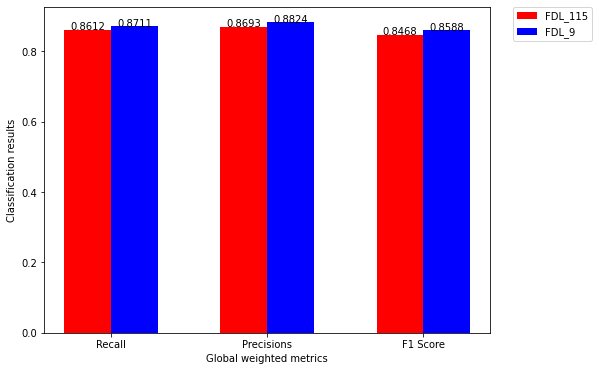

In [ ]:
# Plot the global weighted recall, percisions and f1-score for FDL_115 and FDL_9
def addlabels_115(x,y):
    for i in range(len(x)):
        plt.text(i-0.15, y[i], y[i], ha = 'center')

def addlabels_9(x,y):
    for i in range(len(x)):
        j = i + 0.15
        plt.text(j, y[i], y[i], ha = 'center')

X = ['Recall', "Precisions", "F1 Score"]

X_axis = np.arange(len(X))

f, ax = plt.subplots(figsize=(8,6))

plt.bar(X_axis - 0.15, weighted_rst_115, 0.3, label = 'FDL_115', color = 'red')
plt.bar(X_axis + 0.15, weighted_rst_9, 0.3, label = 'FDL_9', color = 'blue')

plt.xticks(X_axis, X)
addlabels_9(X, weighted_rst_9)
addlabels_115(X, weighted_rst_115)
plt.xlabel("Global weighted metrics")
plt.ylabel("Classification results")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [ ]:
weighted_rst_115

[0.8612, 0.8693, 0.8468]

In [ ]:
time_FDL_nine_featuers

818

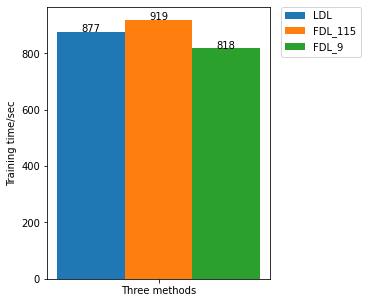

In [ ]:
# Plot the training time for LDL, FDL_9 and FDL_115

def add_time_labels_LDL(x, y):
    plt.text(0, y, y, ha = 'center')

def add_time_labels_FDL_115(x, y):
    plt.text(0.1, y, y, ha = 'center')

def add_time_labels_FDL_9(x, y):
    plt.text(0.2, y, y, ha = 'center')

time_LDL = [877]
time_FDL_115 = [919]
time_FDL_9 = [818]
data = [877, 919, 818]

f, ax = plt.subplots(figsize=(4,5))

X_time = ['Three methods']
X_axis_time = np.arange(len(X_time))

plt.bar(X_axis_time + 0, data[0], 0.1, label = 'LDL')
plt.bar(X_axis_time + 0.1, data[1], 0.1, label = 'FDL_115')
plt.bar(X_axis_time + 0.2, data[2], 0.1, label = 'FDL_9')

add_time_labels_LDL(X_time, data[0])
add_time_labels_FDL_115(X_time, data[1])
add_time_labels_FDL_9(X_time, data[2])

plt.xticks(X_axis_time + 0.1, X_time)

plt.ylabel("Training time/sec")

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)